## 캐글에서 데이터를 불러올 수 있도록 캐글 API로 연동



In [102]:
! pip install --upgrade plotly

In [103]:
# Installing kaggle API
! pip install -q kaggle

In [104]:
# Create a directory as kaggle
! mkdir -p ~/.kaggle

In [98]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (2).json


In [105]:
# Copy API key to kaggle directory
! cp kaggle.json ~/.kaggle

In [106]:
# Disable API key
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-12 11:59:54          18597  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          11264  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           5784  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3965  
nickuzmenkov/nih-chest-xrays-tfrecords                      NIH Chest X-rays

In [107]:
# Importing the dataset 
! kaggle datasets download -d zusmani/pakistans-largest-ecommerce-dataset

pakistans-largest-ecommerce-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [108]:
# Unzipping the dataset
! unzip -q /content/pakistans-largest-ecommerce-dataset.zip

replace Pakistan Largest Ecommerce Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


<br/><br/><br/><br/><br/><br/><br/>







## 1. Data Preprocessiong - 데이터 전처리 

```
item_id	: 아이템 ID
status : 아이템 상태
created_at : 제조일
sku : 재고 관리 코드(제품을 상품군으로 단위화 한 것(재고 관리를 위하여))
price	: 가격
qty_ordered	: 주문 수량
grand_total	: 총 가격[(가격*주문수량)-할인가]
increment_id	: ????
category_name_1	: 카테고리
sales_commission_code	: 판매 수수료 코드
discount_amount	: 할인된 가격
payment_method	: 결제 방식
Working Date : 이용일
BI Status : 경제적 상태 (BI : business intelligence) 
MV : ????
Year : 가입연도
Month	: 가입 달 
Customer Since : 가입시작일
M-Y	: 달 - 연도
FY	: 회계연도 (Fiscal Year)
```

In [109]:
import pandas as pd

In [110]:
data = pd.read_csv("/content/Pakistan Largest Ecommerce Dataset.csv", comment=",") # 데이터 불러오기
data.head() #어떤 데이터인지 처음부터 5개의 행 불러와 확인하기

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.



,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131,complete,7/1/2016,kreations_YI 06-L,1950.00000,1,1950.00000,100147443,Women's Fashion,\N,0.00000,cod,7/1/2016,#REF!,"1,950",2016,7,2016-7,7-2016,FY17,1.00000,nan,nan,nan,nan,nan
1,211133,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.00000,1,240.00000,100147444,Beauty & Grooming,\N,0.00000,cod,7/1/2016,Gross,240,2016,7,2016-7,7-2016,FY17,2.00000,nan,nan,nan,nan,nan
2,211134,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.00000,1,2450.00000,100147445,Women's Fashion,\N,0.00000,cod,7/1/2016,Gross,"2,450",2016,7,2016-7,7-2016,FY17,3.00000,nan,nan,nan,nan,nan
3,211135,complete,7/1/2016,kcc_krone deal,360.00000,1,60.00000,100147446,Beauty & Grooming,R-FSD-52352,300.00000,cod,7/1/2016,Net,360,2016,7,2016-7,7-2016,FY17,4.00000,nan,nan,nan,nan,nan
4,211136,order_refunded,7/1/2016,BK7010400AG,555.00000,2,1110.00000,100147447,Soghaat,\N,0.00000,cod,7/1/2016,Valid,"1,110",2016,7,2016-7,7-2016,FY17,5.00000,nan,nan,nan,nan,nan


In [111]:
data.tail() #마지막 5개의 행도 확인하기 

## tail에서 확인했을 때, 모든 값이 NaN으로 나옴 

## 모든 값 NaN -> 어디서부턴가 입력이 안됐다고 판단 -> 분석할 수 없는 데이터가 포함되어 있다고 판단 -> 분석에 사용할 수 있는 데이터를 추출하기로 결정

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
584519,905204,cod,8/28/2018,WOFSCE5AE00357AECDE,699.00000,1,849.00000,100562385,Women's Fashion,NaN,0.00000,cod,8/28/2018,Valid,699,2018,8,2018-8,8-2018,FY19,115320.00000,nan,nan,nan,nan,nan
584520,905205,processing,8/28/2018,MATHUA5AF70A7D1E50A,35599.00000,1,35899.00000,100562386,Mobiles & Tablets,NaN,0.00000,bankalfalah,8/28/2018,Gross,"35,599",2018,8,2018-8,8-2018,FY19,115326.00000,nan,nan,nan,nan,nan
584521,905206,processing,8/28/2018,MATSAM5B6D7208C6D30,129999.00000,2,652178.00000,100562387,Mobiles & Tablets,NaN,0.00000,bankalfalah,8/28/2018,Gross,"259,998",2018,8,2018-7,8-2018,FY19,113474.00000,nan,nan,nan,nan,nan
584522,905207,processing,8/28/2018,MATSAM5B1509B4696EA,87300.00000,2,652178.00000,100562387,Mobiles & Tablets,NaN,0.00000,bankalfalah,8/28/2018,Gross,"174,600",2018,8,2018-7,8-2018,FY19,113474.00000,nan,nan,nan,nan,nan
584523,905208,processing,8/28/2018,MATSAM5B10F91A9B6AB,108640.00000,2,652178.00000,100562387,Mobiles & Tablets,NaN,0.00000,bankalfalah,8/28/2018,Gross,"217,280",2018,8,2018-7,8-2018,FY19,113474.00000,nan,nan,nan,nan,nan


In [112]:
data.shape # 데이터 크기 확인

## 행 584524, 열 26개의 데이터

(584524, 26)

In [113]:
data.isnull().sum() #결측치 값 확인

## Unnamed 21~25는 전체행 갯수를 결측치로 갖고 있기 때문에 해당 컬럼들을 삭제하기로 결정

item_id                       0
status                       15
created_at                    0
sku                          20
price                         0
qty_ordered                   0
grand_total                   0
increment_id                  0
category_name_1             164
sales_commission_code    137175
discount_amount               0
payment_method                0
Working Date                  0
BI Status                     0
 MV                           0
Year                          0
Month                         0
Customer Since               11
M-Y                           0
FY                            0
Customer ID                  11
Unnamed: 21              584524
Unnamed: 22              584524
Unnamed: 23              584524
Unnamed: 24              584524
Unnamed: 25              584524
dtype: int64

In [114]:
data = data.drop(["Unnamed: 21","Unnamed: 22","Unnamed: 23","Unnamed: 24","Unnamed: 25"], axis=1) #Unnamed 21~25 컬럼 삭제

In [115]:
data

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131,complete,7/1/2016,kreations_YI 06-L,1950.00000,1,1950.00000,100147443,Women's Fashion,\N,0.00000,cod,7/1/2016,#REF!,"1,950",2016,7,2016-7,7-2016,FY17,1.00000
1,211133,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.00000,1,240.00000,100147444,Beauty & Grooming,\N,0.00000,cod,7/1/2016,Gross,240,2016,7,2016-7,7-2016,FY17,2.00000
2,211134,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.00000,1,2450.00000,100147445,Women's Fashion,\N,0.00000,cod,7/1/2016,Gross,"2,450",2016,7,2016-7,7-2016,FY17,3.00000
3,211135,complete,7/1/2016,kcc_krone deal,360.00000,1,60.00000,100147446,Beauty & Grooming,R-FSD-52352,300.00000,cod,7/1/2016,Net,360,2016,7,2016-7,7-2016,FY17,4.00000
4,211136,order_refunded,7/1/2016,BK7010400AG,555.00000,2,1110.00000,100147447,Soghaat,\N,0.00000,cod,7/1/2016,Valid,"1,110",2016,7,2016-7,7-2016,FY17,5.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,905204,cod,8/28/2018,WOFSCE5AE00357AECDE,699.00000,1,849.00000,100562385,Women's Fashion,NaN,0.00000,cod,8/28/2018,Valid,699,2018,8,2018-8,8-2018,FY19,115320.00000
584520,905205,processing,8/28/2018,MATHUA5AF70A7D1E50A,35599.00000,1,35899.00000,100562386,Mobiles & Tablets,NaN,0.00000,bankalfalah,8/28/2018,Gross,"35,599",2018,8,2018-8,8-2018,FY19,115326.00000
584521,905206,processing,8/28/2018,MATSAM5B6D7208C6D30,129999.00000,2,652178.00000,100562387,Mobiles & Tablets,NaN,0.00000,bankalfalah,8/28/2018,Gross,"259,998",2018,8,2018-7,8-2018,FY19,113474.00000
584522,905207,processing,8/28/2018,MATSAM5B1509B4696EA,87300.00000,2,652178.00000,100562387,Mobiles & Tablets,NaN,0.00000,bankalfalah,8/28/2018,Gross,"174,600",2018,8,2018-7,8-2018,FY19,113474.00000


In [116]:
pd.options.display.float_format = '{:.5f}'.format # 출력값이 자연상수로 나오지 않게 하는 코드
data.describe()

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID
count,584524.00000,584524.00000,584524.00000,584524.00000,584524.00000,584524.00000,584524.00000,584513.00000
mean,565667.07422,6348.74753,1.29639,8530.61857,499.49278,2017.04411,7.16765,45790.51196
std,200121.17365,14949.26952,3.99606,61320.81463,1506.94305,0.70735,3.48630,34414.96239
min,211131.00000,0.00000,1.00000,-1594.00000,-599.50000,2016.00000,1.00000,1.00000
25%,395000.75000,360.00000,1.00000,945.00000,0.00000,2017.00000,4.00000,13516.00000
50%,568424.50000,899.00000,1.00000,1960.40000,0.00000,2017.00000,7.00000,42856.00000
75%,739106.25000,4070.00000,1.00000,6999.00000,160.50000,2018.00000,11.00000,73536.00000
max,905208.00000,1012625.90000,1000.00000,17888000.00000,90300.00000,2018.00000,12.00000,115326.00000


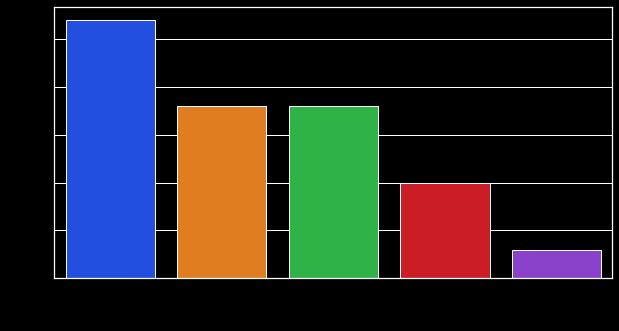

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
total = data[data.grand_total < 0].status.value_counts().to_dict()

total_df = pd.DataFrame(list(total.items()), columns=['Order Status', 'Counts'])

plt.figure(figsize=(10,5))
ax = sns.barplot(data=total_df, x='Order Status', y='Counts', palette='bright')
#ax.bar_label(container = ax.containers[0], padding = 0, fontsize = 22, color='black')
plt.xticks( fontsize=10)
plt.yticks( fontsize=10)
plt.xlabel('Order Status', fontsize=12, labelpad=12, color='black')
plt.ylabel('Counts', fontsize=12, labelpad=12, color='black');
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.show;

In [118]:
data = data[data.grand_total > 0]

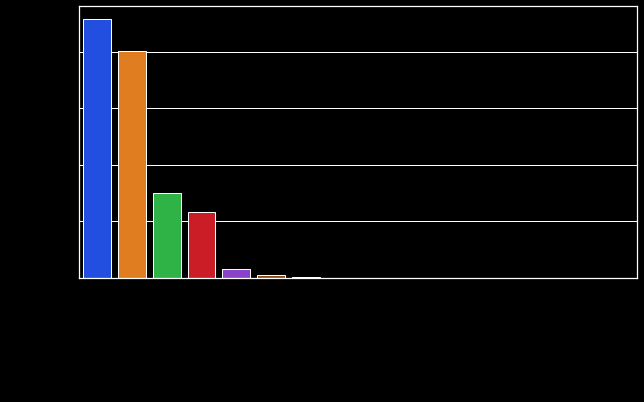

In [119]:
plt.figure(figsize=(10,5))

status = data.status.value_counts()
status_df = pd.DataFrame(list(status.items()), columns=['Order Status', 'Counts'])

ax = sns.barplot(data = status_df, x= 'Order Status', y = "Counts", palette = "bright")
#ax.bar_label(container = ax.containers[0], padding = 0, fontsize = 20, color='white')
plt.xticks( fontsize=10)
plt.yticks( fontsize=10)
plt.xlabel('Order Status', fontsize=12, labelpad=12, color='black')
plt.ylabel('Counts', fontsize=12, labelpad=12, color='black');
plt.xticks(rotation=90, ha='center');
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black');

In [120]:
data.status = data.status.replace({'complete': 'Completed',
                                             'received': 'Completed',
                                             'cod': 'Completed',
                                             'paid': 'Completed',
                                             'closed': 'Completed',
                                             'exchange': 'Completed',
                                             'canceled': 'Canceled',
                                             'order_refunded': 'Canceled',
                                             'refund': 'Canceled',
                                             'fraud': 'Canceled',
                                             'payment_review': 'Pending',
                                             'pending': 'Pending',
                                             'processing': 'Pending',
                                             'holded': 'Pending',
                                             'pending_paypal': 'Pending'})

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



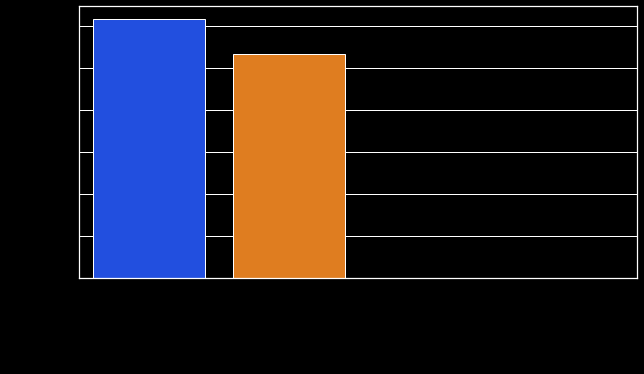

In [121]:
status_updated = data.status.value_counts()

status_updated_df = pd.DataFrame(list(status_updated.items()), columns=['Order Status', 'Counts'])

plt.figure(figsize=(10,5))
ax = sns.barplot(data=status_updated_df, x='Order Status', y='Counts', palette='bright')
#ax.bar_label(container = ax.containers[0], padding = 0, fontsize = 20, color='white')
plt.xticks( fontsize=10)
plt.yticks( fontsize=10)
plt.xlabel('Order Status', fontsize=12, labelpad=12, color='black')
plt.ylabel('Counts', fontsize=12, labelpad=12, color='black');
plt.xticks(rotation=90, ha='center');
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black');

In [122]:
canceled =data[data.status == 'Canceled']

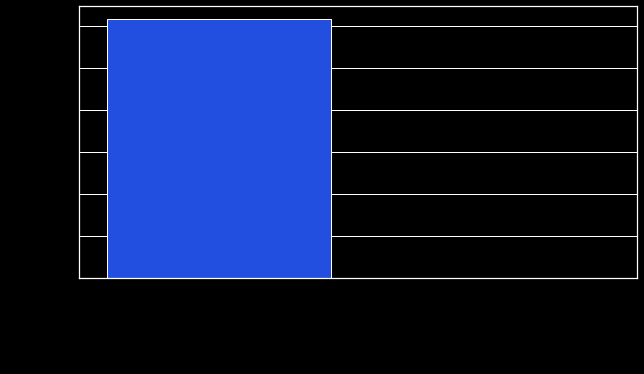

In [123]:
data = data[(data.status == 'Completed') | (data.status == 'Pending')]
status_updated = data.status.value_counts()

status_updated_df = pd.DataFrame(list(status_updated.items()), columns=['Order Status', 'Counts'])

plt.figure(figsize=(10,5))
ax = sns.barplot(data=status_updated_df, x='Order Status', y='Counts', palette='bright')
#ax.bar_label(container = ax.containers[0], padding = 0, fontsize = 20, color='white')
plt.xticks( fontsize=10)
plt.yticks( fontsize=10)
plt.xlabel('Order Status', fontsize=12, labelpad=12, color='black')
plt.ylabel('Counts', fontsize=12, labelpad=12, color='black');
plt.xticks(rotation=90, ha='center');
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black');

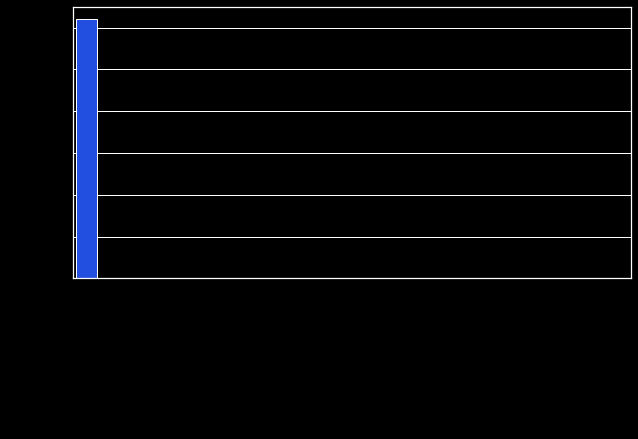

In [124]:
missing_values = data.isna().sum().sort_values(ascending=False)

missing_values_df = pd.DataFrame(list(missing_values.items()), columns=['Column', 'Missing_Values'])

plt.figure(figsize=(10,5))

ax = sns.barplot(data=missing_values_df, x = 'Column', y = 'Missing_Values', palette='bright')
#ax.bar_label(container = ax.containers[0], padding = 0, fontsize = 20, color='white')
plt.xticks( fontsize=10)
plt.yticks( fontsize=10)
ax.set_xlabel('Column', fontsize=12, labelpad=12, color='black')
ax.set_ylabel('Missing Values', fontsize=12, labelpad=12, color='black');
plt.xticks(rotation=90, ha='center');
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black');

In [125]:
data = data.drop(['created_at', 'sku', 'sales_commission_code', 'Customer Since', 'M-Y'], axis=1)

data = data.dropna()

<br/><br/><br/><br/><br/><br/><br/>

## 2. Preliminary Investigations - 예비조사


In [126]:
import plotly.express as px

number_of_orders = data.groupby('Customer ID')['increment_id'].nunique().sort_values(ascending=False)

number_of_orders_df = pd.DataFrame(list(number_of_orders.items()), columns=['Customer ID', 'Number of Orders'])

a = number_of_orders_df[number_of_orders_df['Number of Orders'] == 1].value_counts().sum()
b = number_of_orders_df[number_of_orders_df['Number of Orders'] != 1].value_counts().sum()


data1 = {'Order': ['One Order', 'More than One Order'], 'Customer_Counts': [a, b]}

order_counts = pd.DataFrame.from_dict(data1)

fig = px.pie(order_counts, 
             values = order_counts.Customer_Counts, 
             names = order_counts.Order,
             template = 'plotly_dark')
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker = dict(line = dict(color = 'white', width = 6)))
fig.show()

In [127]:
number_of_prod = data.groupby('Customer ID')['category_name_1'].nunique().sort_values(ascending=False)

number_of_prod_df = pd.DataFrame(list(number_of_prod.items()), columns=['Customer ID', 'Number of Products'])

a = number_of_prod_df[number_of_prod_df['Number of Products'] == 1].value_counts().sum()
b = number_of_prod_df[number_of_prod_df['Number of Products'] != 1].value_counts().sum()

data1 = {'Order': ['One Category', 'More than One Category'], 'Customer_Counts': [a, b]}

category_counts = pd.DataFrame.from_dict(data1)

fig = px.pie(category_counts, 
             values = category_counts.Customer_Counts, 
             names = category_counts.Order,
             template = 'plotly_dark')
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker = dict(line = dict(color = 'white', width = 6)))
fig.show()

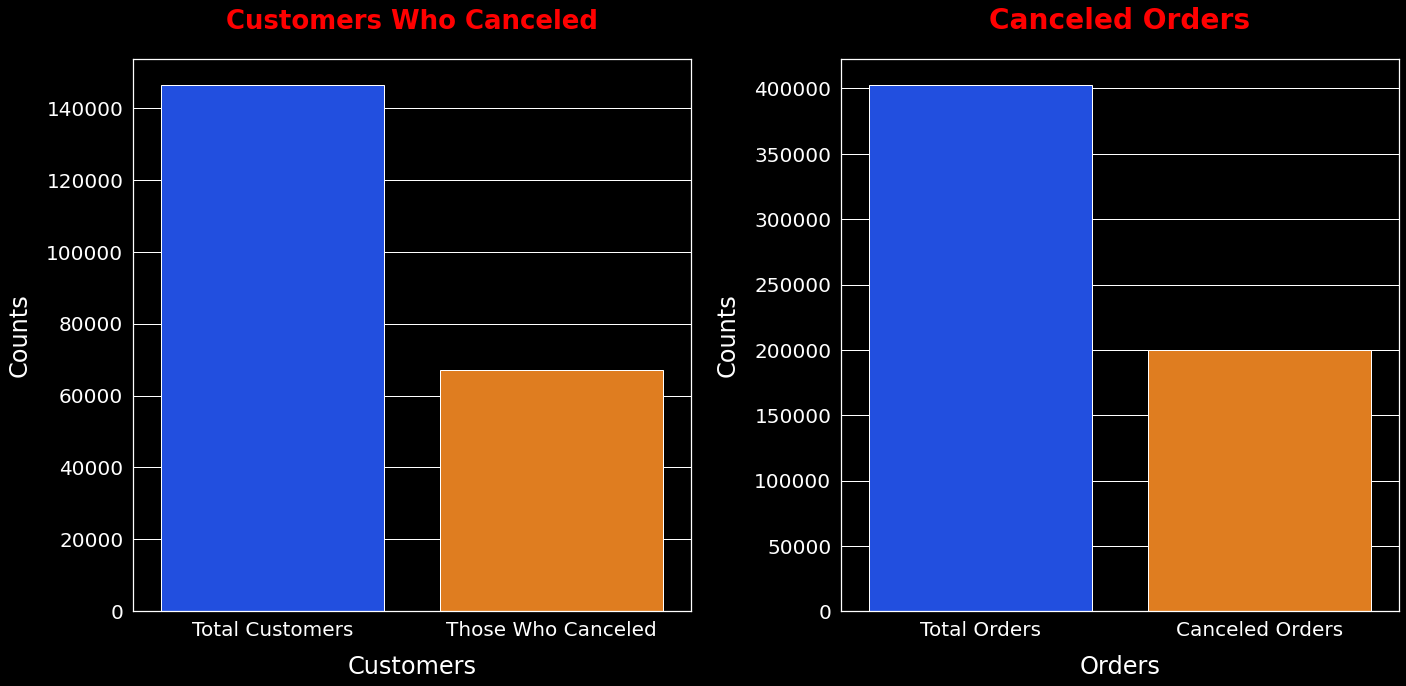

In [128]:
a = data['Customer ID'].nunique() + canceled ['Customer ID'].nunique()
b = canceled ['Customer ID'].nunique()

data1 = {'Customers': ['Total Customers', 'Those Who Canceled'], 'Customer_Counts': [a, b]}

customer_counts = pd.DataFrame.from_dict(data1)


c = data['increment_id'].nunique() + canceled ['increment_id'].nunique()
d = canceled ['increment_id'].nunique()

data2 = {'Orders': ['Total Orders', 'Canceled Orders'], 'Order_Counts': [c, d]}

order_counts = pd.DataFrame.from_dict(data2)


sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : True})

fig, ax = plt.subplots(1,2, figsize = (20,10))
sns.barplot(ax = ax[0], data = customer_counts, x=customer_counts.Customers, y=customer_counts.Customer_Counts, palette= 'bright')
sns.barplot(ax = ax[1], data = order_counts, x=order_counts.Orders, y=order_counts.Order_Counts, palette= 'bright')

ax[0].set_title("Customers Who Canceled", fontsize = 26, pad = 30, color='red', fontweight='bold')
ax[0].set_xlabel("Customers", fontsize = 24, labelpad = 15, color='white')
ax[0].set_ylabel("Counts", fontsize = 24, labelpad = 15, color='white')
ax[0].tick_params(axis='x', colors='white', labelsize=20)
ax[0].tick_params(axis='y', colors='white', labelsize=20)


ax[1].set_title("Canceled Orders", fontsize = 28, pad = 30, color='red', fontweight='bold')
ax[1].set_xlabel("Orders", fontsize = 24, labelpad = 15, color='white')
ax[1].set_ylabel("Counts", fontsize = 24, labelpad = 15, color='white')
ax[1].tick_params(axis='x', colors='white', labelsize=20)
ax[1].tick_params(axis='y', colors='white', labelsize=20);

plt.tight_layout(pad=2);

In [129]:
#canceled = canceled.dropna()
#fig = px.treemap(canceled, path=['category_name_1'], template='plotly_dark')
#fig.update_traces(textfont_color='yellow',textfont_size=16, selector=dict(type='treemap'))
#fig.show()

<br/><br/><br/><br/><br/><br/><br/>

## 3. RFM modeling - 모델링

#### RFM (Recency, Frequency, Monetary) is the method to segment the customers into different clusters based on their past purchasing behavior. Companies often deploy this to get to know their customers well. This helps them to respond to the ever changing customers requirement timely and plan better and effective strategy



Recency

To calculate the Recency we will follow the steps below:

1. Convert the Working Date column to datetime format
2. Set the reference date as the lastest date in the data
3. Filter out the most recent purchase date for each customer
4. Calculate the Recency by subtracting most recent purchase date from the reference date
5. Drop the most recent purchase date column

In [130]:
data['Working Date'] = pd.to_datetime(data['Working Date'])
ref_date = data['Working Date'].max()
data['Date'] = data['Working Date'].apply(lambda x: x.date())
data['Most_Recent_Purchase'] = data.groupby('Customer ID')['Date'].transform(max)
data['Recency'] = (ref_date.date() - data.Most_Recent_Purchase).astype('timedelta64[D]')

In [131]:
data = data.drop('Most_Recent_Purchase', axis=1)

Frequency

In [132]:
data['Frequency'] = data.groupby('Customer ID')['increment_id'].transform('nunique')

Monetary

In [133]:
data['Monetary'] = data.groupby('Customer ID')['grand_total'].transform(sum)

RFM table

In [134]:
RFM_df = data[['Customer ID', 'Recency', 'Frequency', 'Monetary']].drop_duplicates()
RFM_df.head()

,Customer ID,Recency,Frequency,Monetary
0,1.00000,788.00000,1,1950.00000
3,4.00000,1.00000,229,1316173.25000
6,7.00000,500.00000,4,105.00000
7,6.00000,788.00000,1,170.00000
10,9.00000,788.00000,1,5500.00000


RFM scores

In [135]:
RFM_quantiles = RFM_df[['Recency', 'Frequency', 'Monetary']].quantile(q = [0.25, 0.5, 0.75])

RFM_df.loc[(RFM_df['Recency'] <= RFM_quantiles.Recency[0.25]), 'Rscore'] = 4.0
RFM_df.loc[(RFM_df['Recency'] > RFM_quantiles.Recency[0.25]) & (RFM_df.Recency <= RFM_quantiles.Recency[0.5]), 'Rscore'] = 3.0
RFM_df.loc[(RFM_df['Recency'] > RFM_quantiles.Recency[0.5]) & (RFM_df.Recency <= RFM_quantiles.Recency[0.75]), 'Rscore'] = 2.0
RFM_df.loc[(RFM_df['Recency'] > RFM_quantiles.Recency[0.75]), 'Rscore'] = 1.0

RFM_df.loc[(RFM_df['Frequency'] <= RFM_quantiles.Frequency[0.25]), 'Fscore'] = 1.0
RFM_df.loc[(RFM_df['Frequency'] > RFM_quantiles.Frequency[0.25]) & (RFM_df['Frequency'] <= RFM_quantiles.Frequency[0.5]), 'Fscore'] = 2.0
RFM_df.loc[(RFM_df['Frequency'] > RFM_quantiles.Frequency[0.5]) & (RFM_df['Frequency'] <= RFM_quantiles.Frequency[0.75]), 'Fscore'] = 3.0
RFM_df.loc[(RFM_df['Frequency'] > RFM_quantiles.Frequency[0.75]), 'Fscore'] = 4.0

RFM_df.loc[(RFM_df['Monetary'] <= RFM_quantiles.Monetary[0.25]), 'Mscore'] = 1.0
RFM_df.loc[(RFM_df['Monetary'] > RFM_quantiles.Monetary[0.25]) & (RFM_df['Monetary'] <= RFM_quantiles.Monetary[0.5]), 'Mscore'] = 2.0
RFM_df.loc[(RFM_df['Monetary'] > RFM_quantiles.Monetary[0.5]) & (RFM_df['Monetary'] <= RFM_quantiles.Monetary[0.75]), 'Mscore'] = 3.0
RFM_df.loc[(RFM_df['Monetary'] > RFM_quantiles.Monetary[0.75]), 'Mscore'] = 4.0

RFM_df['RFM_score'] = RFM_df.Rscore + RFM_df.Fscore + RFM_df.Mscore

Customers Segmentation: RFM Score

In [136]:
RFM_df.loc[(RFM_df['RFM_score'] == 12.0), 'Cluster'] = 'Champions'
RFM_df.loc[(RFM_df['RFM_score'] == 11.0), 'Cluster'] = 'Loyal Customers'
RFM_df.loc[(RFM_df['RFM_score'] >= 9.0) & (RFM_df['RFM_score'] <= 10.0), 'Cluster'] = 'Promising Customers'
RFM_df.loc[(RFM_df['RFM_score'] >= 7.0) & (RFM_df['RFM_score'] <= 8.0), 'Cluster'] = 'At Risk'
RFM_df.loc[(RFM_df['RFM_score'] >= 4.0) & (RFM_df['RFM_score'] <= 6.0), 'Cluster'] = 'Hibernating'
RFM_df.loc[(RFM_df['RFM_score'] == 3.0), 'Cluster'] = 'Lost Customers'

Interpretation of Clusters

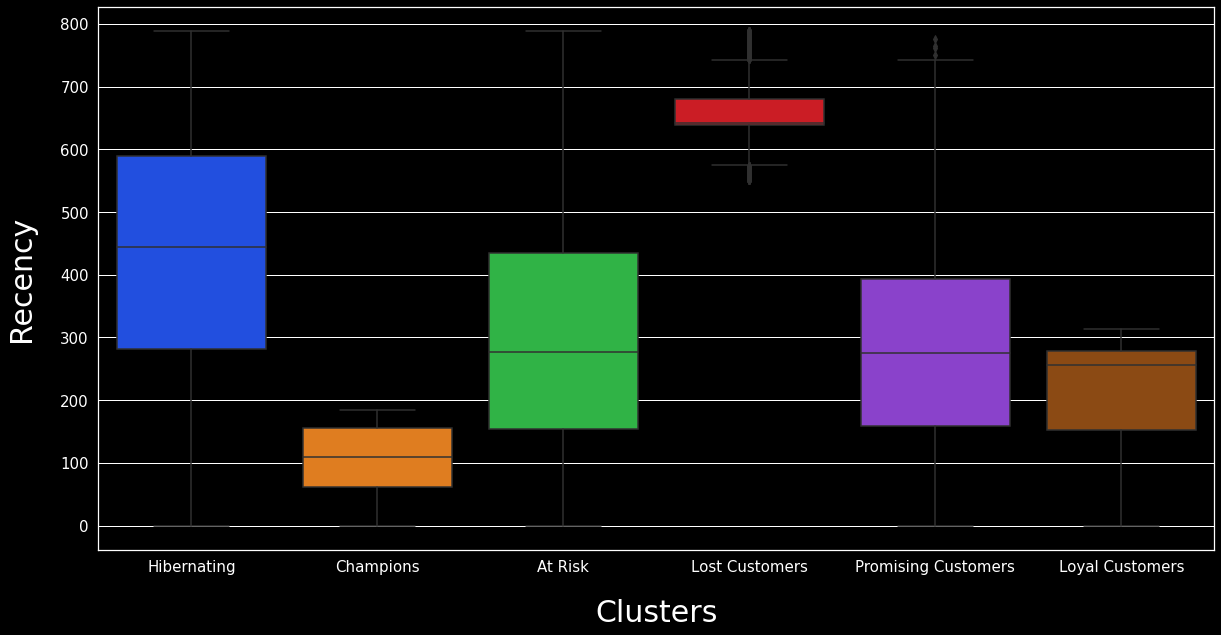

In [137]:
plt.figure(figsize=(20,10))

ax = sns.boxplot(data=RFM_df, x='Cluster', y = 'Recency', palette='bright');
plt.xticks( fontsize=15)
plt.yticks( fontsize=15)
plt.xlabel('Clusters', fontsize=30, labelpad=24, color='white')
plt.ylabel('Recency', fontsize=30, labelpad=24, color='white');
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white');

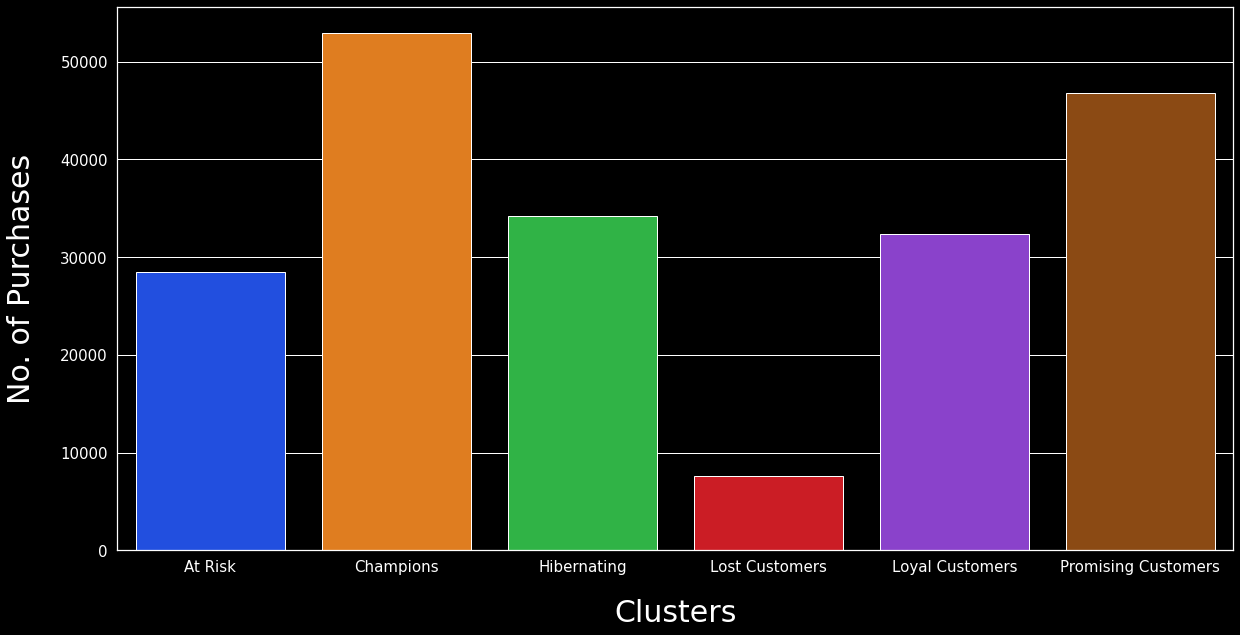

In [138]:

frequency = RFM_df.groupby('Cluster')['Frequency'].sum()
frequency_df = pd.DataFrame(list(frequency.items()), columns=['Cluster', 'Number_of_Purchases'])

plt.figure(figsize=(20,10))

ax = sns.barplot(data=frequency_df, x='Cluster', y='Number_of_Purchases', palette='bright')
#ax.bar_label(container = ax.containers[0], padding = 0, fontsize = 22, color='white')
plt.xticks( fontsize=15)
plt.yticks( fontsize=15)
plt.xlabel('Clusters', fontsize=30, labelpad=24, color='white')
plt.ylabel('No. of Purchases', fontsize=30, labelpad=24, color='white');
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white');

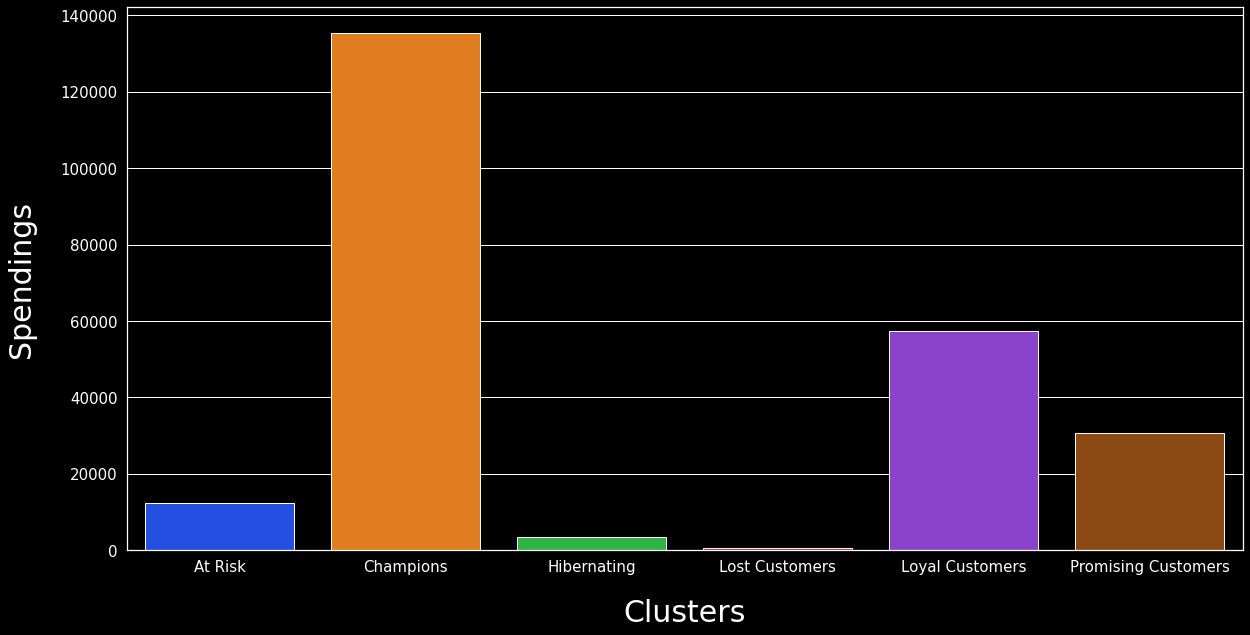

In [139]:
frequency = RFM_df.groupby('Cluster')['Monetary'].mean()
frequency_df = pd.DataFrame(list(frequency.items()), columns=['Cluster', 'Spendings'])

plt.figure(figsize=(20,10))

ax = sns.barplot(data=frequency_df, x='Cluster', y='Spendings', palette='bright')
#ax.bar_label(container = ax.containers[0], padding = 0, fontsize = 22, color='white')
plt.xticks( fontsize=15)
plt.yticks( fontsize=15)
plt.xlabel('Clusters', fontsize=30, labelpad=24, color='white')
plt.ylabel('Spendings', fontsize=30, labelpad=24, color='white');
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white');

## 4. Exploratory Data Analysis

In [140]:
cluster_mapping = pd.Series(RFM_df.Cluster.values, index=RFM_df['Customer ID']).to_dict()

data['Cluster'] = data['Customer ID'].map(cluster_mapping)

cluster distribution

In [141]:
cluster_counts = RFM_df.Cluster.value_counts()

cluster_counts_df = pd.DataFrame(list(cluster_counts.items()), columns=['Cluster', 'Number_of_Customers'])


fig = px.pie(cluster_counts_df, 
             values = cluster_counts_df.Number_of_Customers, 
             names = cluster_counts_df.Cluster,
             template = 'plotly_dark')
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker = dict(line = dict(color = 'white', width = 6)))
fig.show()

Famous Product Categories: Clusters Wise

In [142]:
#fig = px.treemap(data, path=['Cluster','category_name_1'], template='plotly_dark', height=1000)
#fig.update_traces(textfont_color='yellow', textfont_size=16, selector=dict(type='treemap'))
#fig.show()

Spending Habits by Clusters

In [143]:
cluster1 = data[data.Cluster == 'Champions'].groupby('category_name_1')['grand_total'].sum().to_frame().reset_index()
cluster1.columns = ['Category', 'Grand_Total_Cluster1']

cluster2 = data[data.Cluster == 'Loyal Customers'].groupby('category_name_1')['grand_total'].sum().to_frame().reset_index()
cluster2.columns = ['Category', 'Grand_Total_Cluster2']

cluster3 = data[data.Cluster == 'Promising Customers'].groupby('category_name_1')['grand_total'].sum().to_frame().reset_index()
cluster3.columns = ['Category', 'Grand_Total_Cluster3']

cluster4 = data[data.Cluster == 'At Risk'].groupby('category_name_1')['grand_total'].sum().to_frame().reset_index()
cluster4.columns = ['Category', 'Grand_Total_Cluster4']

cluster5 = data[data.Cluster == 'Hibernating'].groupby('category_name_1')['grand_total'].sum().to_frame().reset_index()
cluster5.columns = ['Category', 'Grand_Total_Cluster5']

cluster6 = data[data.Cluster == 'Lost Customers'].groupby('category_name_1')['grand_total'].sum().to_frame().reset_index()
cluster6.columns = ['Category', 'Grand_Total_Cluster6']

merged = cluster1.merge(cluster2, how='left').merge(cluster3, how='left').merge(cluster4, how='left').merge(cluster5, how='left').merge(cluster6, how='left')

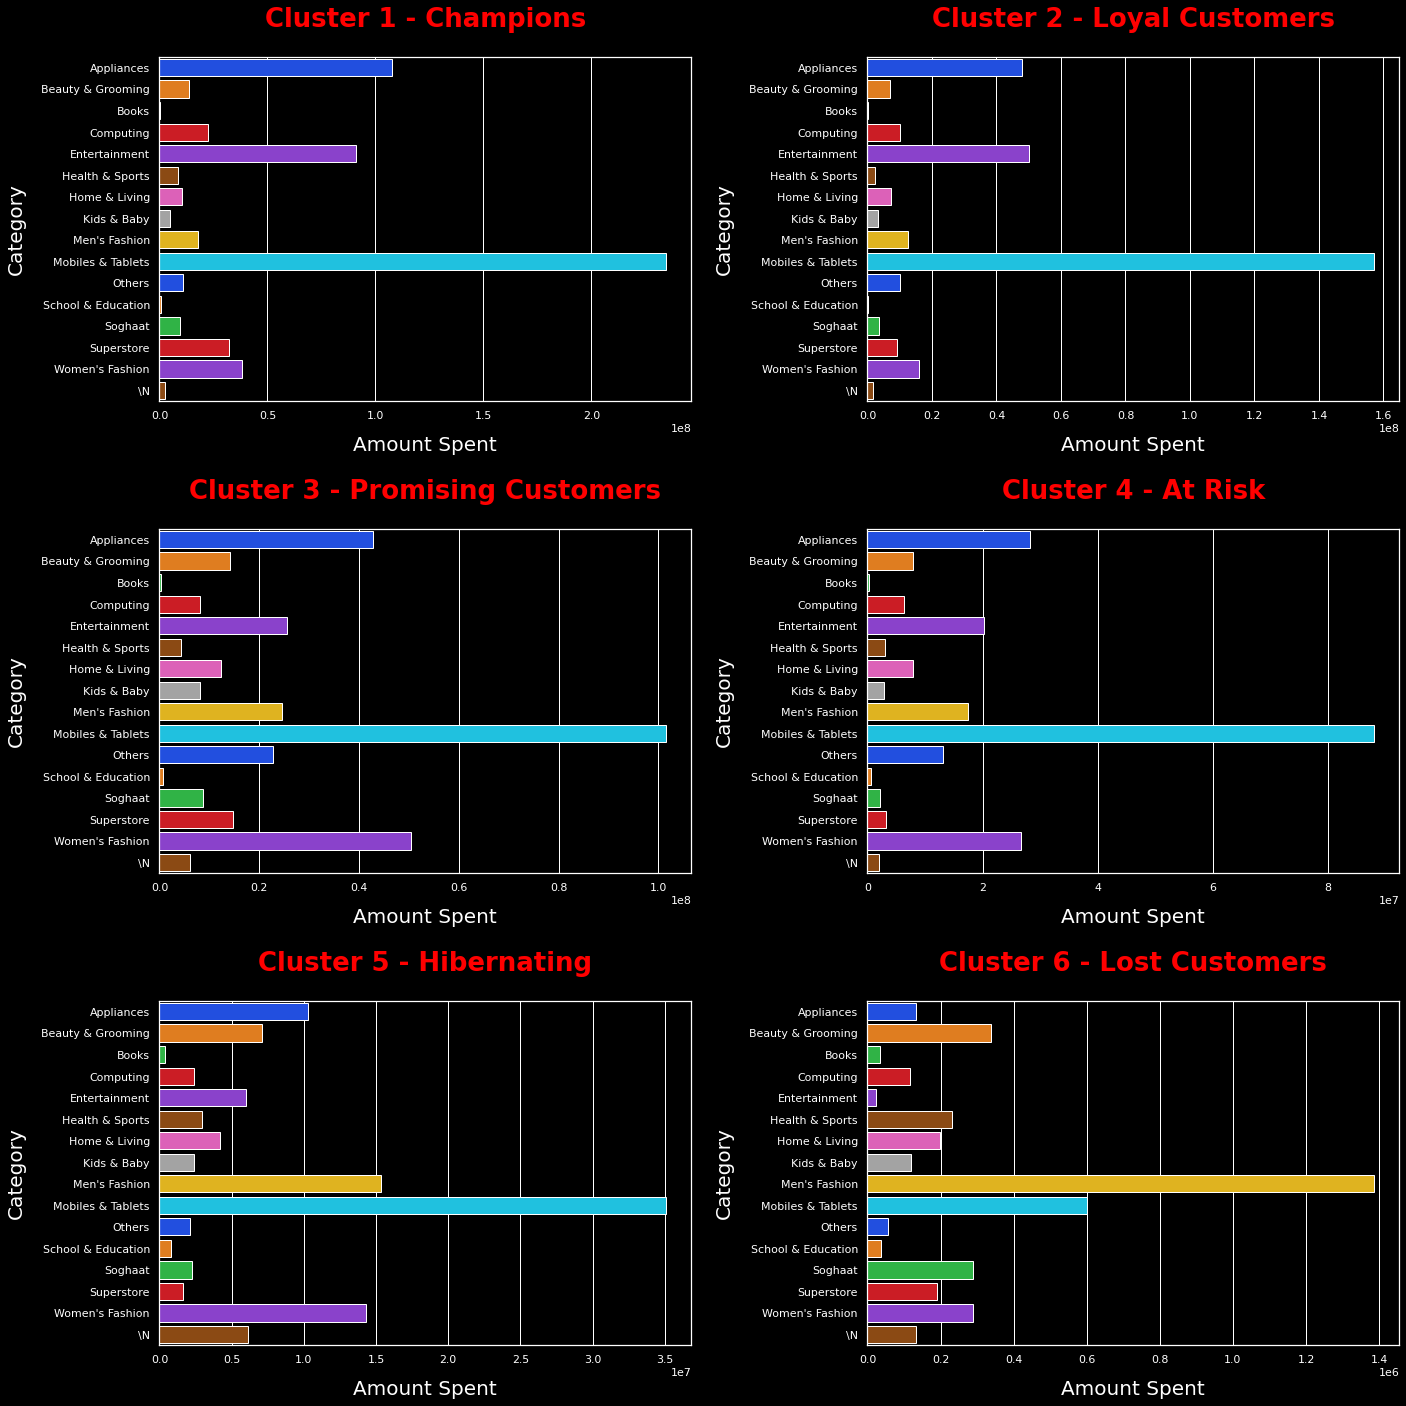

In [144]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : True})

fig, ax = plt.subplots(3,2, figsize = (20,20))
sns.barplot(ax = ax[0,0], data = cluster1, y=cluster1.Category, x=cluster1.Grand_Total_Cluster1, palette= 'bright')
sns.barplot(ax = ax[0,1], data = cluster2, y=cluster2.Category, x=cluster2.Grand_Total_Cluster2, palette= 'bright')
sns.barplot(ax = ax[1,0], data = cluster3, y=cluster3.Category, x=cluster3.Grand_Total_Cluster3, palette= 'bright')
sns.barplot(ax = ax[1,1], data = cluster4, y=cluster4.Category, x=cluster4.Grand_Total_Cluster4, palette= 'bright')
sns.barplot(ax = ax[2,0], data = cluster5, y=cluster5.Category, x=cluster5.Grand_Total_Cluster5, palette= 'bright')
sns.barplot(ax = ax[2,1], data = cluster6, y=cluster6.Category, x=cluster6.Grand_Total_Cluster6, palette= 'bright')

ax[0,0].set_title("Cluster 1 - Champions", fontsize = 26, pad = 30, color='red', fontweight='bold')
ax[0,0].set_xlabel("Amount Spent", fontsize = 20, labelpad = 15, color='white')
ax[0,0].set_ylabel("Category", fontsize = 20, labelpad = 15, color='white')
ax[0,0].tick_params(axis='x', colors='white')
ax[0,0].tick_params(axis='y', colors='white')

ax[0,1].set_title("Cluster 2 - Loyal Customers", fontsize = 26, pad = 30, color='red', fontweight='bold')
ax[0,1].set_xlabel("Amount Spent", fontsize = 20, labelpad = 15, color='white')
ax[0,1].set_ylabel("Category", fontsize = 20, labelpad = 15, color='white')
ax[0,1].tick_params(axis='x', colors='white')
ax[0,1].tick_params(axis='y', colors='white')

ax[1,0].set_title("Cluster 3 - Promising Customers", fontsize = 26, pad = 30, color='red', fontweight='bold')
ax[1,0].set_xlabel("Amount Spent", fontsize = 20, labelpad = 15, color='white')
ax[1,0].set_ylabel("Category", fontsize = 20, labelpad = 15, color='white')
ax[1,0].tick_params(axis='x', colors='white')
ax[1,0].tick_params(axis='y', colors='white')

ax[1,1].set_title("Cluster 4 - At Risk", fontsize = 26, pad = 30, color='red', fontweight='bold')
ax[1,1].set_xlabel("Amount Spent", fontsize = 20, labelpad = 15, color='white')
ax[1,1].set_ylabel("Category", fontsize = 20, labelpad = 15, color='white')
ax[1,1].tick_params(axis='x', colors='white')
ax[1,1].tick_params(axis='y', colors='white')

ax[2,0].set_title("Cluster 5 - Hibernating", fontsize = 26, pad = 30, color='red', fontweight='bold')
ax[2,0].set_xlabel("Amount Spent", fontsize = 20, labelpad = 15, color='white')
ax[2,0].set_ylabel("Category", fontsize = 20, labelpad = 15, color='white')
ax[2,0].tick_params(axis='x', colors='white')
ax[2,0].tick_params(axis='y', colors='white')

ax[2,1].set_title("Cluster 6 - Lost Customers", fontsize = 26, pad = 30, color='red', fontweight='bold')
ax[2,1].set_xlabel("Amount Spent", fontsize = 20, labelpad = 15, color='white')
ax[2,1].set_ylabel("Category", fontsize = 20, labelpad = 15, color='white')
ax[2,1].tick_params(axis='x', colors='white')
ax[2,1].tick_params(axis='y', colors='white')

plt.tight_layout(pad=2);

Payment Method by Clusters

In [145]:
cluster1_payment = data[data.Cluster == 'Champions'].payment_method.value_counts().to_frame().reset_index()
cluster1_payment.columns = ['Category', 'Payment_Method_Cluster1']

cluster2_payment = data[data.Cluster == 'Loyal Customers'].payment_method.value_counts().to_frame().reset_index()
cluster2_payment.columns = ['Category', 'Payment_Method_Cluster2']

cluster3_payment = data[data.Cluster == 'Promising Customers'].payment_method.value_counts().to_frame().reset_index()
cluster3_payment.columns = ['Category', 'Payment_Method_Cluster3']

cluster4_payment = data[data.Cluster == 'At Risk'].payment_method.value_counts().to_frame().reset_index()
cluster4_payment.columns = ['Category', 'Payment_Method_Cluster4']

cluster5_payment = data[data.Cluster == 'Hibernating'].payment_method.value_counts().to_frame().reset_index()
cluster5_payment.columns = ['Category', 'Payment_Method_Cluster5']

cluster6_payment = data[data.Cluster == 'Lost Customers'].payment_method.value_counts().to_frame().reset_index()
cluster6_payment.columns = ['Category', 'Payment_Method_Cluster6']

merged_payment = cluster1_payment.merge(cluster2_payment, how='left').merge(cluster3_payment, how='left').merge(cluster4_payment, how='left').merge(cluster5_payment, how='left').merge(cluster6_payment, how='left')

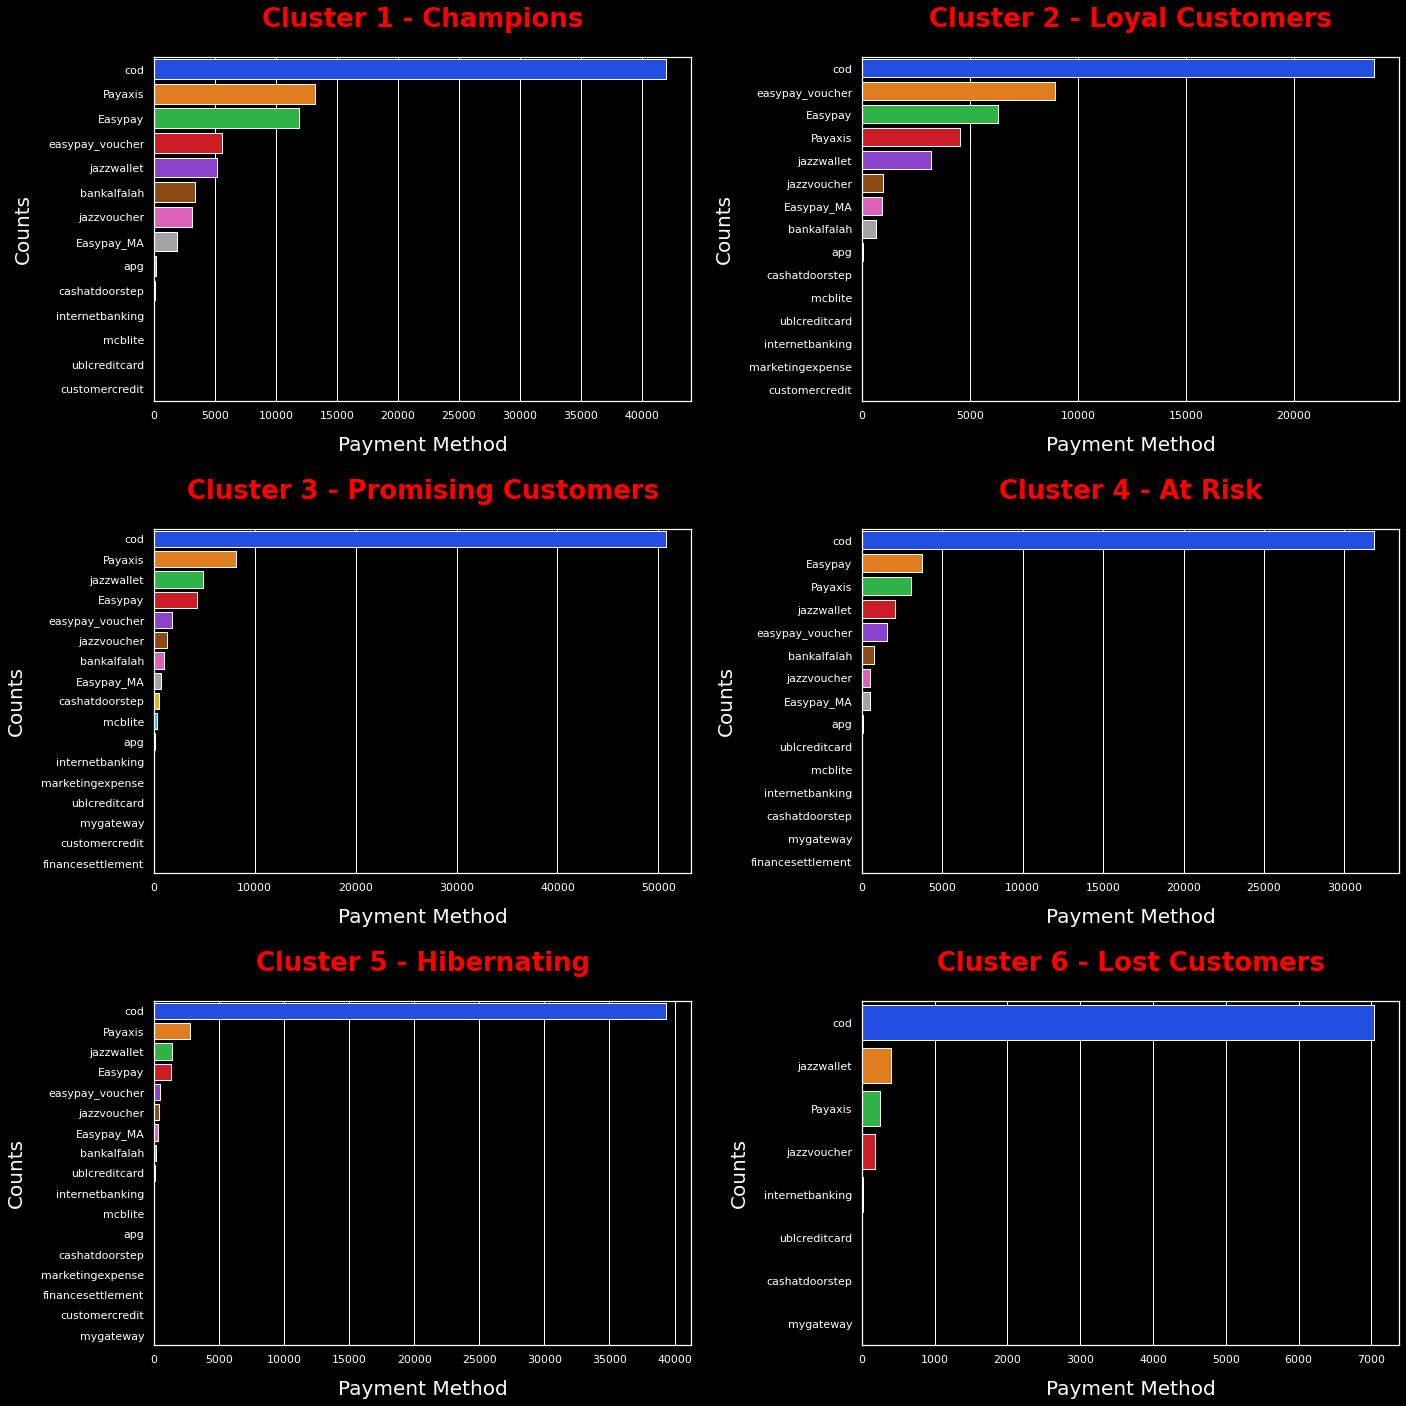

In [146]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : True})

fig, ax = plt.subplots(3,2, figsize = (20,20))
sns.barplot(ax = ax[0,0], data = cluster1_payment, y=cluster1_payment.Category, x=cluster1_payment.Payment_Method_Cluster1, palette= 'bright')
sns.barplot(ax = ax[0,1], data = cluster2_payment, y=cluster2_payment.Category, x=cluster2_payment.Payment_Method_Cluster2, palette= 'bright')
sns.barplot(ax = ax[1,0], data = cluster3_payment, y=cluster3_payment.Category, x=cluster3_payment.Payment_Method_Cluster3, palette= 'bright')
sns.barplot(ax = ax[1,1], data = cluster4_payment, y=cluster4_payment.Category, x=cluster4_payment.Payment_Method_Cluster4, palette= 'bright')
sns.barplot(ax = ax[2,0], data = cluster5_payment, y=cluster5_payment.Category, x=cluster5_payment.Payment_Method_Cluster5, palette= 'bright')
sns.barplot(ax = ax[2,1], data = cluster6_payment, y=cluster6_payment.Category, x=cluster6_payment.Payment_Method_Cluster6, palette= 'bright')

ax[0,0].set_title("Cluster 1 - Champions", fontsize = 26, pad = 30, color='red', fontweight='bold')
ax[0,0].set_xlabel("Payment Method", fontsize = 20, labelpad = 15, color='white')
ax[0,0].set_ylabel("Counts", fontsize = 20, labelpad = 15, color='white')
ax[0,0].tick_params(axis='x', colors='white')
ax[0,0].tick_params(axis='y', colors='white')

ax[0,1].set_title("Cluster 2 - Loyal Customers", fontsize = 26, pad = 30, color='red', fontweight='bold')
ax[0,1].set_xlabel("Payment Method", fontsize = 20, labelpad = 15, color='white')
ax[0,1].set_ylabel("Counts", fontsize = 20, labelpad = 15, color='white')
ax[0,1].tick_params(axis='x', colors='white')
ax[0,1].tick_params(axis='y', colors='white')

ax[1,0].set_title("Cluster 3 - Promising Customers", fontsize = 26, pad = 30, color='red', fontweight='bold')
ax[1,0].set_xlabel("Payment Method", fontsize = 20, labelpad = 15, color='white')
ax[1,0].set_ylabel("Counts", fontsize = 20, labelpad = 15, color='white')
ax[1,0].tick_params(axis='x', colors='white')
ax[1,0].tick_params(axis='y', colors='white')

ax[1,1].set_title("Cluster 4 - At Risk", fontsize = 26, pad = 30, color='red', fontweight='bold')
ax[1,1].set_xlabel("Payment Method", fontsize = 20, labelpad = 15, color='white')
ax[1,1].set_ylabel("Counts", fontsize = 20, labelpad = 15, color='white')
ax[1,1].tick_params(axis='x', colors='white')
ax[1,1].tick_params(axis='y', colors='white')

ax[2,0].set_title("Cluster 5 - Hibernating", fontsize = 26, pad = 30, color='red', fontweight='bold')
ax[2,0].set_xlabel("Payment Method", fontsize = 20, labelpad = 15, color='white')
ax[2,0].set_ylabel("Counts", fontsize = 20, labelpad = 15, color='white')
ax[2,0].tick_params(axis='x', colors='white')
ax[2,0].tick_params(axis='y', colors='white')

ax[2,1].set_title("Cluster 6 - Lost Customers", fontsize = 26, pad = 30, color='red', fontweight='bold')
ax[2,1].set_xlabel("Payment Method", fontsize = 20, labelpad = 15, color='white')
ax[2,1].set_ylabel("Counts", fontsize = 20, labelpad = 15, color='white')
ax[2,1].tick_params(axis='x', colors='white')
ax[2,1].tick_params(axis='y', colors='white')

plt.tight_layout(pad=2);

Order Status by Clusters

In [147]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

completed_orders = data[data.status == 'Completed'].Cluster.value_counts().to_frame().reset_index()
completed_orders.columns = ['Cluster', 'Order_Counts']

pending_orders = data[data.status == 'Pending'].Cluster.value_counts().to_frame().reset_index()
pending_orders.columns = ['Cluster', 'Order_Counts']


fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=['Completed Orders', 'Pending Orders'])

fig.add_trace(go.Pie(labels=completed_orders.Cluster, values=completed_orders.Order_Counts),1, 1)

fig.add_trace(go.Pie(labels=pending_orders.Cluster, values=pending_orders.Order_Counts),1, 2)


fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker = dict(line = dict(color = 'white', width = 6)))

fig.update_layout(template='plotly_dark', height=600, width=1000)
fig.show()